In [268]:
#Import all necessary modules and packages to perform kmeans

#For creating dataframes and handling arrays
import pandas as pd #enables use of pandas libraries with alias pd
import numpy as np #enables use of numpy libraries with alias np
import string

#For removing stopwords
from nltk.corpus import stopwords

#For word embedding using frequency/counts method
from sklearn.feature_extraction.text import CountVectorizer

#For izing data in preparation for principal component analysis and performing PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#For LSA 
from sklearn.decomposition import TruncatedSVD

#For LDA
from sklearn.decomposition import LatentDirichletAllocation

#For calculating Umass coherence
import math
from collections import defaultdict

#For plotting
import matplotlib.pyplot as plt

#For performing kMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#from word embedding using frquency counts methods
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [269]:
# Load dataset
file_path = 'data/PeerSupport_Level3.xlsx'
data = pd.read_excel(file_path)
pd.reset_option('display.max_colwidth')


#regular
dataset = pd.DataFrame()
dataset.loc[:, 'PeerSupportResponse'] = data['PeerSupportResponse'].astype(str)
print(dataset.head(20))


                                  PeerSupportResponse
0                                         Communicate
1                                          Good to Go
2                                                 nan
3                                                 nan
4   Not wast etime by going around in circles with...
5                       Interact with each other more
6                                                 nan
7                                  Ask good questions
8                                                 nan
9                                                 nan
10                                                nan
11  Each student works out 1 or 2 homework problem...
12  Reduce the amount of talking and other distrac...
13               Worksheets might help; more examples
14  Always ask questions if they don't understand....
15                           Not watch anime in class
16               Communicate more, talk to each other
17                       Mak

In [270]:
from wordcloud import WordCloud, STOPWORDS
import string
import pandas as pd
import numpy as np
import re
import contractions

# Convert all text to lower case
dataset['LowerCase'] = dataset['PeerSupportResponse'].astype(str).str.lower()

# Remove punctuation, safely handle None / NaN
def remove_punctuation(text):
    if not isinstance(text, str):
        return ''
    return ''.join([char for char in text if char not in string.punctuation])

dataset['RemovePunctuation'] = dataset['LowerCase'].apply(remove_punctuation)

# Define “empty” responses
EMPTY_RESPONSES = {
    "nothing", "n/a", "na", "none", "nil", "idk",
    "no comment", "blank", "no response", "no idea", "nada", "nan"
}

# Convert empty / junk responses to NaN
def clean_empty_cells(text):
    if not isinstance(text, str) or text.strip() == '':
        return np.nan
    
    text_stripped = text.strip().lower()
    
    # Convert to NaN if the whole text matches an empty response
    if text_stripped in EMPTY_RESPONSES:
        return np.nan
    
    # Convert to NaN if **any word** matches an empty response
    words = text_stripped.split()
    if any(word in EMPTY_RESPONSES for word in words):
        return np.nan
    
    return text

dataset['NoResponse'] = dataset['RemovePunctuation'].apply(clean_empty_cells)
dataset['NoResponse'] = dataset['NoResponse'].replace(
    ["nan", "NaN", "N/A", "n/a", "na", "none", "nothing", ""],
    np.nan
)
#=======contractions and other stuff=======
# Words/phrases to replace consistently
def replace_terms(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r'\bta(s)?\b', 'teachingassistant', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(oh|office hour(s)?)\b', 'officehours', text, flags=re.IGNORECASE)
    return text

# Main cleaning function
def eliminate_noise(data):
    # Convert to string
    data = str(data)
    # data = data.replace("student", "") 
    # data = data.replace("class", "") 
    # data = data.replace("question", "")
    
    # Step 0.5: Replace domain-specific terms
    data = replace_terms(data)
    
    # Step 1: Expand contractions
    data = contractions.fix(data)
    
    # Step 2: Remove special characters (keep letters, numbers, spaces)
    kept_chars = [char for char in data if char.isalnum() or char.isspace()]
    data = "".join(kept_chars)
    
    data = data.strip()
    
    return data

# Apply to your column
dataset['NoContractions'] = dataset['NoResponse'].apply(eliminate_noise)


#=======REMOVE STOP WORDS=======
CUSTOM_STOPWORDS = set(STOPWORDS) - {"not"}

# Define normalization function
def normalize(text):
    # Step 1: Lowercase
    text = str(text).lower()
    
    # Step 2: Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in CUSTOM_STOPWORDS]
    
    return " ".join(filtered_words)

dataset.loc[:, 'NoStopWords'] = dataset['NoContractions'].apply(normalize)


#=======Correct Spelling=======
from textblob import TextBlob


def correct_spelling(text):
    return str(TextBlob(text).correct())

dataset['CorrectedText'] = dataset['NoStopWords'].apply(correct_spelling)


print(dataset.head(20))



                                  PeerSupportResponse  \
0                                         Communicate   
1                                          Good to Go   
2                                                 nan   
3                                                 nan   
4   Not wast etime by going around in circles with...   
5                       Interact with each other more   
6                                                 nan   
7                                  Ask good questions   
8                                                 nan   
9                                                 nan   
10                                                nan   
11  Each student works out 1 or 2 homework problem...   
12  Reduce the amount of talking and other distrac...   
13               Worksheets might help; more examples   
14  Always ask questions if they don't understand....   
15                           Not watch anime in class   
16               Communicate mo

In [271]:
import spacy
#python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")  # Load spaCy’s English model

# lemmatization function
def lemm_data(data):
    doc = nlp(str(data))
    return " ".join([token.lemma_.lower() for token in doc if token.is_alpha])

#=======INITIALIZE LEMMATIZATION=======
dataset['lemmatized_data'] = dataset['CorrectedText'].apply(lemm_data)




In [272]:
#visual comparison
pd.set_option('display.max_rows', 200)   # show up to 200 rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_colwidth', 1000)  # expand column width for long text

dataset[['PeerSupportResponse', 'lemmatized_data']].head(90)

PeerSupportResponse  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Communicate   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Good to Go   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       nan   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [273]:
pd.set_option('display.max_rows', 200)   # show up to 200 rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_colwidth', 1000)  # expand column width for long text

dataset['lemmatized_data'] = dataset['lemmatized_data'].replace(["nan", "NaN", ""], np.nan)

dataset[['CorrectedText', 'lemmatized_data']].head(90)

dataset['clean_data'] = dataset['lemmatized_data']


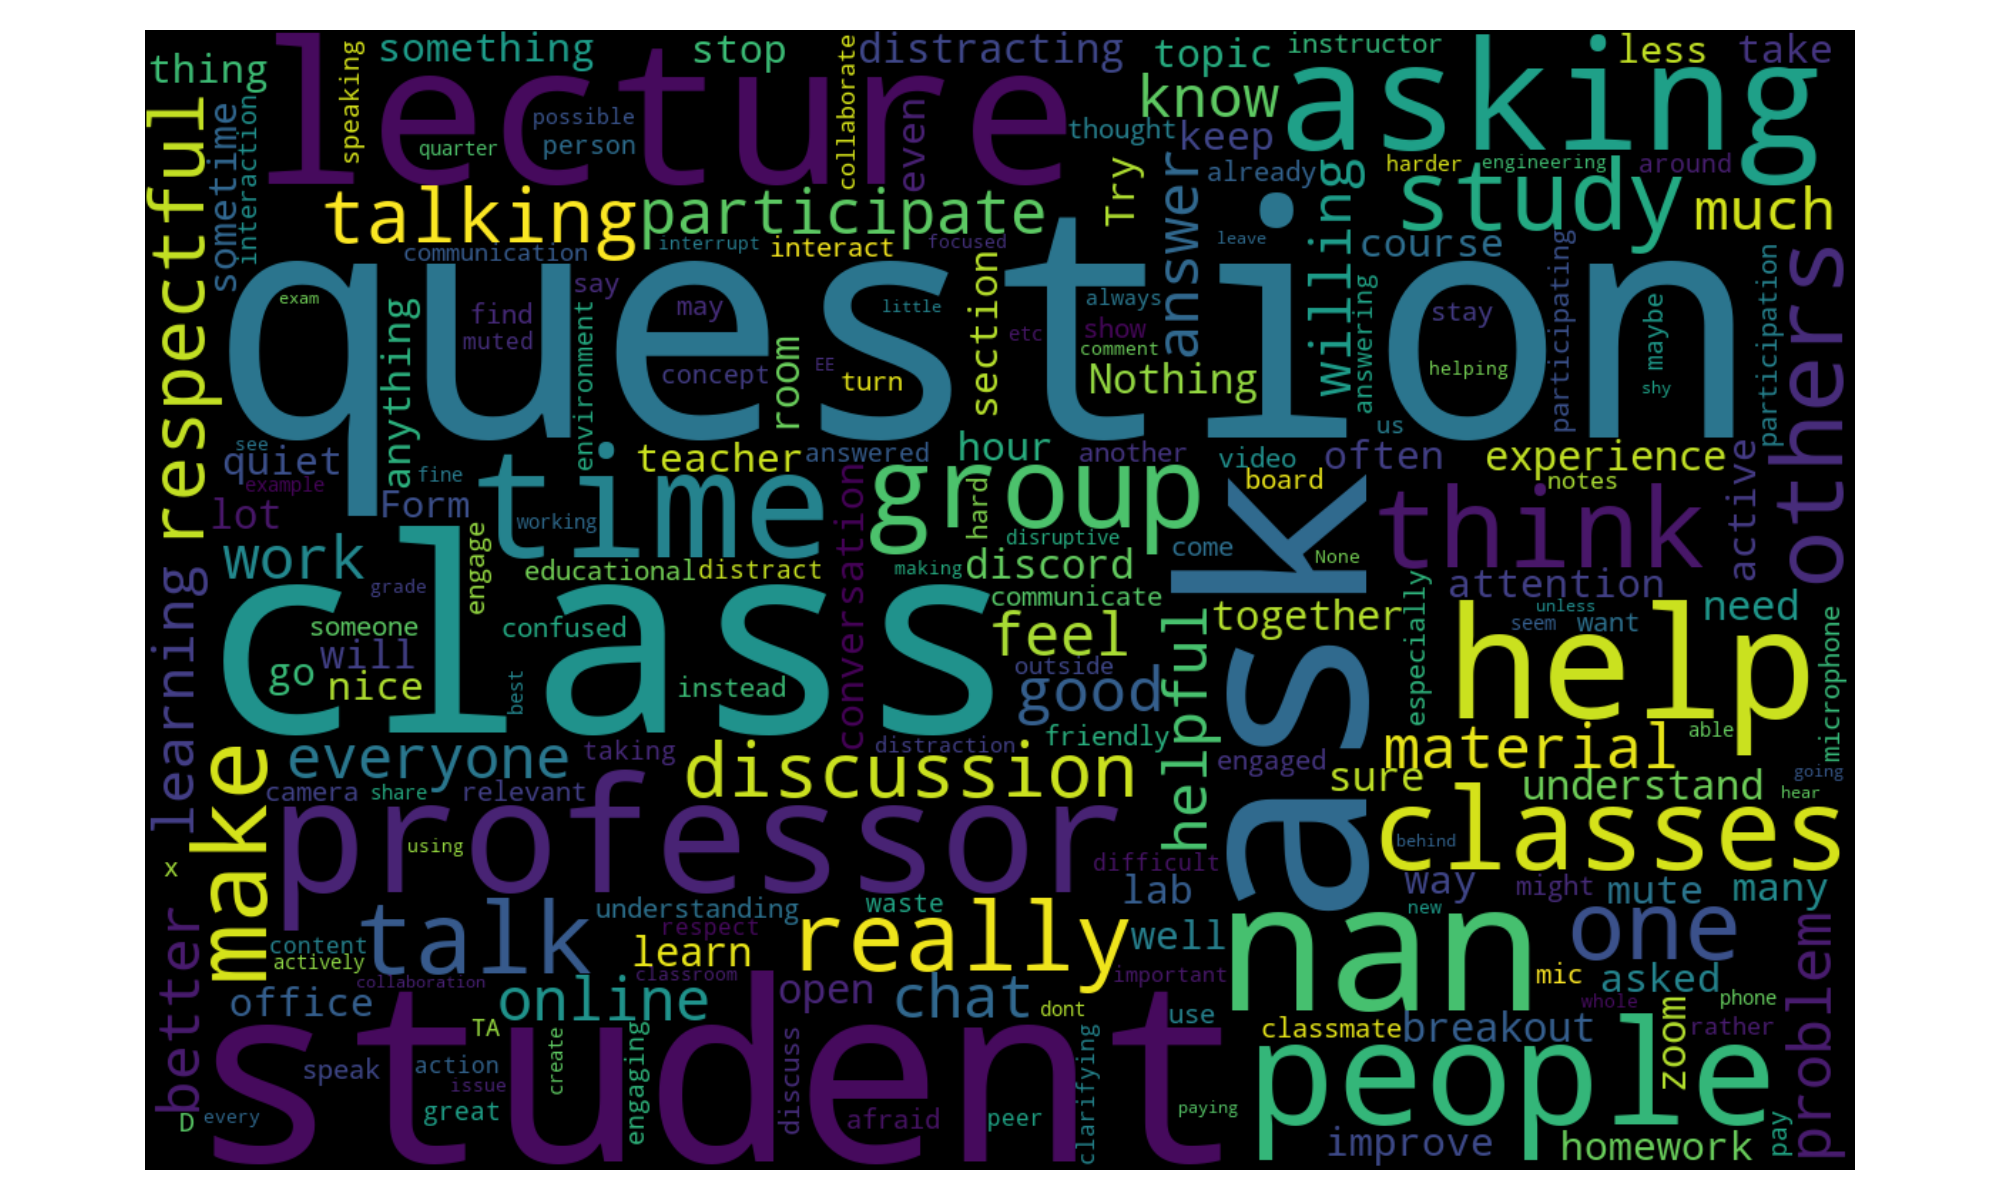

In [274]:
#========GENERATE WORD CLOUD===========
#Use Load Data sample code to load data from Excel file as 
#dataframe requres dataframe called 'data' with column label 'raw_data'
#stores word cloud in file called 1_rawd_WC.png
#adjust as necessary to suit the task at hand

#%pip install wordcloud matplotlib
# ^Installs necessary libraries to current kernel (not device)

# Imports
from wordcloud import WordCloud, STOPWORDS # Wordcloud builder + Stopwords
import matplotlib.pyplot as plt # Visual rendering
from IPython.display import Image # Display image in Jupyter

# Wordcloud function
def gen_wordcloud(data, output):
   
    # Step 1: convert everything to string and drop blanks
    text_list = data.dropna().astype(str).tolist()
    # dropna -> removes NAN , astype(str) -> converts o string , tolist() -> convert panda set to list
    
    # Step 2: join into one big string
    combined = " ".join(text_list)

    # This step (including the "regexp" below) is only included to fix visuals to include contractions
    combined = combined.replace("’", "'").replace("‘", "'")
    
    wc = WordCloud(width=1200, height=800, stopwords=STOPWORDS, collocations=False, regexp=r"[A-Za-z']+") # Initialize empty wordcloud
    wc.generate(combined) # Populate wordcloud with "combined" data
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(output, dpi=200)
    plt.close()
    
# Calling gen_wordcloud


gen_wordcloud(dataset['lemmatized_data'], "dataset_afterProccessing.png") # Saves to directory
gen_wordcloud(dataset['PeerSupportResponse'], "dataset_beforeProccessing.png") # Saves to directory


Image("dataset_afterProccessing.png") # Displays image in your environment
Image("dataset_beforeProccessing.png") # Displays image in your environment


Word Embedding

In [275]:
#nan_rows are the rows where we dropped for the count vectorizor


nan_rows = dataset[dataset['lemmatized_data'].isna()].index.tolist()
print("Dropped rows due to NaN:", nan_rows)
text_data = dataset['lemmatized_data'].dropna().tolist()

Dropped rows due to NaN: [2, 3, 6, 8, 9, 10, 32, 50, 71, 74, 77, 82, 89, 103, 116, 117, 129, 130, 135, 139, 145, 150, 151, 153, 161, 162, 163, 170, 174, 175, 177, 178, 180, 182, 186, 191, 203, 206, 210, 212, 218, 238, 251, 260, 270, 275, 277, 282, 284, 315, 347, 352, 355, 358, 368, 372, 384, 388, 402, 425, 459, 467, 469, 476, 477, 483, 511, 518, 525, 537, 551, 555, 556, 557, 560, 564, 581, 586, 587, 601, 604, 610, 620, 621, 638, 639, 640, 653, 656, 666, 669, 674, 678, 679, 682, 684, 689, 690, 700, 702, 712, 719, 723, 748, 749, 758, 759, 767, 772, 775, 787, 791, 795, 805, 810, 814, 818, 836, 849, 852, 854, 861, 876, 908, 924, 938, 939, 951, 955, 957, 961, 992, 997, 999, 1001, 1005, 1011, 1017, 1020, 1025, 1039, 1040, 1041, 1043, 1045, 1060, 1061, 1080, 1082, 1089, 1108, 1118, 1121, 1127, 1131, 1146, 1165, 1181, 1192, 1194, 1200, 1207, 1235, 1242, 1244, 1252, 1258, 1263, 1265, 1268, 1270, 1272, 1281, 1283, 1287, 1294, 1312, 1313, 1316, 1318, 1323, 1325, 1326, 1329, 1330, 1331, 1335, 1339

In [276]:
#count vectorizor,
vectorizer = CountVectorizer(
    stop_words='english',  # remove standard English stopwords
    min_df=2,  # optional: ignore words that appear in <2 documents
    ngram_range=(1,1)
)
count = vectorizer.fit_transform(text_data)
count_df = pd.DataFrame(count.toarray(), columns=vectorizer.get_feature_names_out())

print(count_df.head(10))

   able  abuse  academic  academically  accept  achieve  act  action  active  \
0     0      0         0             0       0        0    0       0       0   
1     0      0         0             0       0        0    0       0       0   
2     0      0         0             0       0        0    0       0       0   
3     0      0         0             0       0        0    0       0       0   
4     0      0         0             0       0        0    0       0       0   
5     0      0         0             0       0        0    0       0       0   
6     0      0         0             0       0        0    0       0       0   
7     0      0         0             0       0        0    0       0       0   
8     0      0         0             0       0        0    0       0       0   
9     0      0         0             0       0        0    0       0       0   

   actively  activity  actual  actually  add  address  advantage  affect  \
0         0         0       0         0    

In [277]:


tfidf_vect = TfidfVectorizer(max_df=0.8,#ignore words that appear in more that 80% of documents. 
                              min_df=2, #ignore words that appear in <2 documents 
                              ngram_range=(1,1),
                              stop_words='english')
tf_idf = tfidf_vect.fit_transform(text_data)

feature_names = tfidf_vect.get_feature_names_out()
tf_idf_df = pd.DataFrame(tf_idf.toarray(), columns=feature_names)
print(tf_idf_df.head(10))


   able  abuse  academic  academically  accept  achieve  act  action  active  \
0   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
1   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
2   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
3   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
4   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
5   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
6   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
7   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
8   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   
9   0.0    0.0       0.0           0.0     0.0      0.0  0.0     0.0     0.0   

   actively  activity  actual  actually  add  address  advantage  affect  \
0       0.0       0.0     0.0       0.0  0.

In [278]:

#Create LDA Model
#n_components is number of topics

num_topics = 4

LDA_model = LatentDirichletAllocation(
    n_components=num_topics,
    doc_topic_prior=0.25,     # alpha
    topic_word_prior=0.001,    # beta
    learning_decay=0.7,
    batch_size=50,
    max_iter=100,
    random_state=42
)

lda_doc_topic = LDA_model.fit(tf_idf_df)
#lda_doc_topic = LDA_model.transform(tf_idf_df)

#Look at all the words extracted from the corpus (i.e., the document dataset)
#This is a sanity check to ensure the words extracted (and those discarded make sense
print (feature_names)
print ('\n')

['able' 'abuse' 'academic' 'academically' 'accept' 'achieve' 'act'
 'action' 'active' 'actively' 'activity' 'actual' 'actually' 'add'
 'address' 'advantage' 'affect' 'afraid' 'air' 'allow' 'annoying'
 'anonymous' 'answer' 'applicable' 'appreciate' 'appropriate' 'arrive'
 'ask' 'asking' 'aspect' 'assign' 'assignment' 'assistance' 'assume'
 'attempt' 'attend' 'attendance' 'attention' 'attentive' 'attitude'
 'audit' 'average' 'avoid' 'aware' 'away' 'awkward' 'background' 'bad'
 'base' 'basically' 'begin' 'behavior' 'believe' 'beneficial' 'benefit'
 'big' 'bit' 'board' 'book' 'bother' 'box' 'brave' 'break' 'breakup'
 'bring' 'build' 'camera' 'canvas' 'captor' 'care' 'carry' 'case' 'casual'
 'catch' 'cause' 'certain' 'challenge' 'chance' 'change' 'channel' 'chat'
 'cheat' 'check' 'clarification' 'clarify' 'clarity' 'class' 'classmate'
 'classroom' 'clear' 'clearly' 'click' 'close' 'clot' 'cold' 'collaborate'
 'collaboration' 'college' 'come' 'comfortable' 'comment' 'common'
 'commonly' 'com

In [279]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score


# #use lda_doc_topic, count, tf_idf
# data = lda_doc_topic


# # -------------------------------
# # Step 1: Define range of clusters
# # -------------------------------
# k_values = range(2, 11)  # test k from 2 to 10
# inertia_list = []
# silhouette_list = []

# # -------------------------------
# # Step 2: Run KMeans and collect metrics
# # -------------------------------
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#     cluster_labels = kmeans.fit_predict(data)
    
#     # Inertia (for elbow plot)
#     inertia_list.append(kmeans.inertia_)
    
#     # Silhouette score
#     score = silhouette_score(data, cluster_labels)
#     silhouette_list.append(score)

# # -------------------------------
# # Step 3: Plot Elbow plot (Inertia)
# # -------------------------------
# plt.figure(figsize=(8, 4))
# plt.plot(k_values, inertia_list, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

# # -------------------------------
# # Step 4: Plot Silhouette scores
# # -------------------------------
# plt.figure(figsize=(8, 4))
# plt.plot(k_values, silhouette_list, marker='o', color='green')
# plt.title('Silhouette Scores for Different k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()


In [280]:
#LDA Aviod False Positives (high precision)


topic_word_distributions = LDA_model.components_

#Initiate topics
k = topic_word_distributions.shape[0]
topics = [None]*k

#Map the numebrs in LDA_model.components_ back to words
feature_names = tfidf_vect.get_feature_names_out()#Retrieve the top (most frequently occurring) words for each topic
n_top_words = 8  # Number of top words to display per topic
for topic_idx, topic in enumerate(topic_word_distributions):
    
    top_word_indices = topic.argsort()[:-n_top_words-1:-1]
    top_words = [feature_names[i] for i in top_word_indices]  
    topics[topic_idx] = top_words
    
    print(f"Topic {topic_idx}: {' '.join(top_words)}")
    
top_words_topics = topics[0:num_topics]

#test single doc
doc_topic_dist = LDA_model.transform(tf_idf_df)
print(dataset.loc[0, 'clean_data'])
print(doc_topic_dist[0])


Topic 0: respectful help understand problem open work student class
Topic 1: question good class discussion ask student know helpful
Topic 2: question ask participate group class study room willing
Topic 3: lecture class talk question ask sure engage student
communicate
[0.125 0.125 0.625 0.125]


In [281]:
#DomainExpert (groundtruth) Dataset

# Load dataset



file_path = 'data/PeerSupport_Level3.xlsx'
data = pd.read_excel(file_path)
pd.reset_option('display.max_colwidth')

groundtruth = pd.DataFrame()
groundtruth.loc[:, 'DomainExpert_AssignedTheme1'] = data['DomainExpert_AssignedTheme1'].astype(str)

# Define mapping
label_to_number = {
    "Civility": 1,
    "Collaboration": 2,
    "Engagement": 3,
    "QuestioningPractice": 4,
    "NoResponse": 5,
    "NoSuggestion": 6,
    "Outlier": 7
}

# Apply mapping
groundtruth['AssignedThemeNumber'] = groundtruth['DomainExpert_AssignedTheme1'].map(label_to_number)

groundtruth = groundtruth.drop(index=nan_rows)

# Optional: reset the index if you want it to be consecutive
groundtruth = groundtruth.reset_index(drop=True)

# Optional: check results
print(groundtruth)

     DomainExpert_AssignedTheme1  AssignedThemeNumber
0                  Collaboration                  2.0
1                   NoSuggestion                  6.0
2            QuestioningPractice                  4.0
3                  Collaboration                  2.0
4            QuestioningPractice                  4.0
...                          ...                  ...
1484                     Outlier                  7.0
1485         QuestioningPractice                  4.0
1486         QuestioningPractice                  4.0
1487               Collaboration                  2.0
1488         QuestioningPractice                  4.0

[1489 rows x 2 columns]


In [282]:
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

# 1️⃣ Assign each document its most probable LDA topic
lda_doc_topic = LDA_model.transform(tf_idf_df)  # shape: n_docs x n_topics
predicted_topics = lda_doc_topic.argmax(axis=1)  # most probable topic per document

# 2️⃣ Map LDA topics to ground truth labels using majority vote
topic_to_label = {}
num_topics = LDA_model.n_components
for topic_num in range(num_topics):
    # Get the ground truth labels for docs assigned to this topic
    labels_in_topic = groundtruth['AssignedThemeNumber'][predicted_topics == topic_num]
    if len(labels_in_topic) > 0:
        # Assign the most common label in this topic
        most_common_label = Counter(labels_in_topic).most_common(1)[0][0]
        topic_to_label[topic_num] = most_common_label
    else:
        # If no docs assigned to this topic, map to a placeholder (e.g., 0)
        topic_to_label[topic_num] = 0

# 3️⃣ Convert LDA topics to predicted labels
predicted_labels = np.array([topic_to_label[t] for t in predicted_topics])

# 4️⃣ Ground truth labels
true_labels = groundtruth['AssignedThemeNumber'].values

# 5️⃣ Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# 6️⃣ Compute classification metrics
report = classification_report(true_labels, predicted_labels, zero_division=0)
print("Classification Report:")
print(report)


labels = np.unique(true_labels)  # all ground truth labels
metrics_per_label = []

for label in labels:
    TP = np.sum((predicted_labels == label) & (true_labels == label))
    FP = np.sum((predicted_labels == label) & (true_labels != label))
    FN = np.sum((predicted_labels != label) & (true_labels == label))
    TN = np.sum((predicted_labels != label) & (true_labels != label))
    
    metrics_per_label.append({
        'Label': label,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    })

tp_tn_fp_fn_df = pd.DataFrame(metrics_per_label)
print(tp_tn_fp_fn_df)



Confusion Matrix:
[[198   0   0 144   0   0   0]
 [118   0   0 249   0   0   0]
 [ 94   0   0  94   0   0   0]
 [143   0   0 268   0   0   0]
 [  4   0   0   5   0   0   0]
 [ 51   0   0  58   0   0   0]
 [ 30   0   0  33   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.31      0.58      0.40       342
         2.0       0.00      0.00      0.00       367
         3.0       0.00      0.00      0.00       188
         4.0       0.31      0.65      0.42       411
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        63

    accuracy                           0.31      1489
   macro avg       0.09      0.18      0.12      1489
weighted avg       0.16      0.31      0.21      1489

   Label   TP   FP   FN    TN
0    1.0  198  440  144   707
1    2.0    0    0  367  1122
2    3.0    0    0  188  1301
3    4.0  268  583  143 

In [283]:
#Optimize Topic Coherence


from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Convert corpus_documents into Gensim format
corpus_documents = dataset.loc[:, 'clean_data'].dropna().str.split()
texts = corpus_documents  # Already tokenized list of lists

# Create a Gensim dictionary and BoW corpus
dictionary = Dictionary(texts)
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Topics from your sklearn model are lists of top words per topic
topics_for_gensim = top_words_topics

# --- Compute UMass Coherence ---
coherence_umass_model = CoherenceModel(
    topics=topics_for_gensim,
    corpus=corpus_bow,
    dictionary=dictionary,
    coherence='u_mass'
)
umass_score = coherence_umass_model.get_coherence()

# --- Compute C_v Coherence ---
coherence_cv_model = CoherenceModel(
    topics=topics_for_gensim,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'
)
cv_score = coherence_cv_model.get_coherence()

# --- Compute UCI Coherence (a.k.a. c_uci) ---
coherence_uci_model = CoherenceModel(
    topics=topics_for_gensim,
    texts=texts,
    dictionary=dictionary,
    coherence='c_uci'
)
uci_score = coherence_uci_model.get_coherence()

print(f"UMass Coherence   : {umass_score:.4f}")
print(f"C_v Coherence     : {cv_score:.4f}")
print(f"UCI Coherence     : {uci_score:.4f}")


UMass Coherence   : -2.5887
C_v Coherence     : 0.4175
UCI Coherence     : -0.8067


In [284]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# ------------------------------
# Define sweep parameters
# ------------------------------

num_topics_list = [2, 3, 4, 7, 10]
alpha_list = [0.1, 0.25, 0.5, 0.75, 1.0]
beta_list = [0.001, 0.1, 0.5, 1.0]
#Word_Embeddings = [count, tf_idf]
ngrams = [1,2]

#Testing 
# num_topics_list = [4]
# alpha_list = [0.25]
# beta_list = [0.001]

# Prepare corpus for gensim coherence
corpus_documents = dataset.loc[:, 'clean_data'].dropna().str.split()
texts = corpus_documents.tolist()
dictionary = Dictionary(texts)
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Storage for results
results = []

# ------------------------------
# Nested sweep
# ------------------------------
for ngram in ngrams:
    for num_topics in num_topics_list:
        for alpha in alpha_list:
            for beta in beta_list:
                # ------------------------------
                # Fit LDA
                # ------------------------------

                #count vectorizor,
                

                tfidf_vect = TfidfVectorizer(max_df=0.8,#ignore words that appear in more that 80% of documents. 
                                            min_df=2, #ignore words that appear in <2 documents 
                                            ngram_range=(1,ngram),
                                            stop_words='english')
                tf_idf = tfidf_vect.fit_transform(text_data)

                feature_names = tfidf_vect.get_feature_names_out()
                
                #print(tf_idf_df.head(10))



                LDA_model = LatentDirichletAllocation(
                    n_components=num_topics,
                    doc_topic_prior=alpha,
                    topic_word_prior=beta,
                    learning_decay=0.7,
                    batch_size=50,
                    max_iter=100,
                    random_state=42
                )
                lda_doc_topic = LDA_model.fit_transform(tf_idf)  # n_docs x n_topics
                
                # ------------------------------
                # Assign topics to documents
                # ------------------------------
                predicted_topics = lda_doc_topic.argmax(axis=1)
                
                topic_to_label = {}
                for topic_num in range(num_topics):
                    labels_in_topic = groundtruth['AssignedThemeNumber'][predicted_topics == topic_num]
                    if len(labels_in_topic) > 0:
                        topic_to_label[topic_num] = Counter(labels_in_topic).most_common(1)[0][0]
                    else:
                        topic_to_label[topic_num] = 0
                
                predicted_labels = np.array([topic_to_label[t] for t in predicted_topics])
                true_labels = groundtruth['AssignedThemeNumber'].values
                
                # ------------------------------
                # Classification metrics
                # ------------------------------
                labels_unique = np.unique(true_labels)
                metrics = {}
                TP_total = FP_total = FN_total = TN_total = 0
                
                for label in labels_unique:
                    TP = np.sum((predicted_labels == label) & (true_labels == label))
                    FP = np.sum((predicted_labels == label) & (true_labels != label))
                    FN = np.sum((predicted_labels != label) & (true_labels == label))
                    TN = np.sum((predicted_labels != label) & (true_labels != label))
                    
                    TP_total += TP
                    FP_total += FP
                    FN_total += FN
                    TN_total += TN
                
                report = classification_report(true_labels, predicted_labels, zero_division=0, output_dict=True)
                
                # ------------------------------
                # Extract top words per topic for coherence
                # ------------------------------
                #feature_names = tf_idf_vect.get_feature_names_out()  # assuming you have this defined
                top_words_topics = []
                for topic_idx, topic in enumerate(LDA_model.components_):
                    top_words = [feature_names[i] for i in topic.argsort()[-10:]]  # top 10 words
                    top_words_topics.append(top_words)
                
                # ------------------------------
                # Compute Coherence Scores
                # ------------------------------
                coherence_umass_model = CoherenceModel(
                    topics=top_words_topics,
                    corpus=corpus_bow,
                    dictionary=dictionary,
                    coherence='u_mass'
                )
                umass_score = coherence_umass_model.get_coherence()
                
                coherence_cv_model = CoherenceModel(
                    topics=top_words_topics,
                    texts=texts,
                    dictionary=dictionary,
                    coherence='c_v'
                )
                cv_score = coherence_cv_model.get_coherence()
                
                coherence_uci_model = CoherenceModel(
                    topics=top_words_topics,
                    texts=texts,
                    dictionary=dictionary,
                    coherence='c_uci'
                )
                uci_score = coherence_uci_model.get_coherence()
                
                # ------------------------------
                # Save results
                # ------------------------------
                results.append({
                    'ngram': ngram,
                    'num_topics': num_topics,
                    'alpha': alpha,
                    'beta': beta,
                    'TP': TP_total,
                    'FP': FP_total,
                    'FN': FN_total,
                    'TN': TN_total,
                    'precision': report['weighted avg']['precision'],
                    'recall': report['weighted avg']['recall'],
                    'f1_score': report['weighted avg']['f1-score'],
                    'umass': umass_score,
                    'c_v': cv_score,
                    'uci': uci_score
                })

# ------------------------------
# Export results to Excel
# ------------------------------
results_df = pd.DataFrame(results)
results_df.to_excel('lda_hyperparameter_sweep_results.xlsx', index=False)
print("Sweep completed and results exported to 'lda_hyperparameter_sweep_results.xlsx'.")


Sweep completed and results exported to 'lda_hyperparameter_sweep_results.xlsx'.


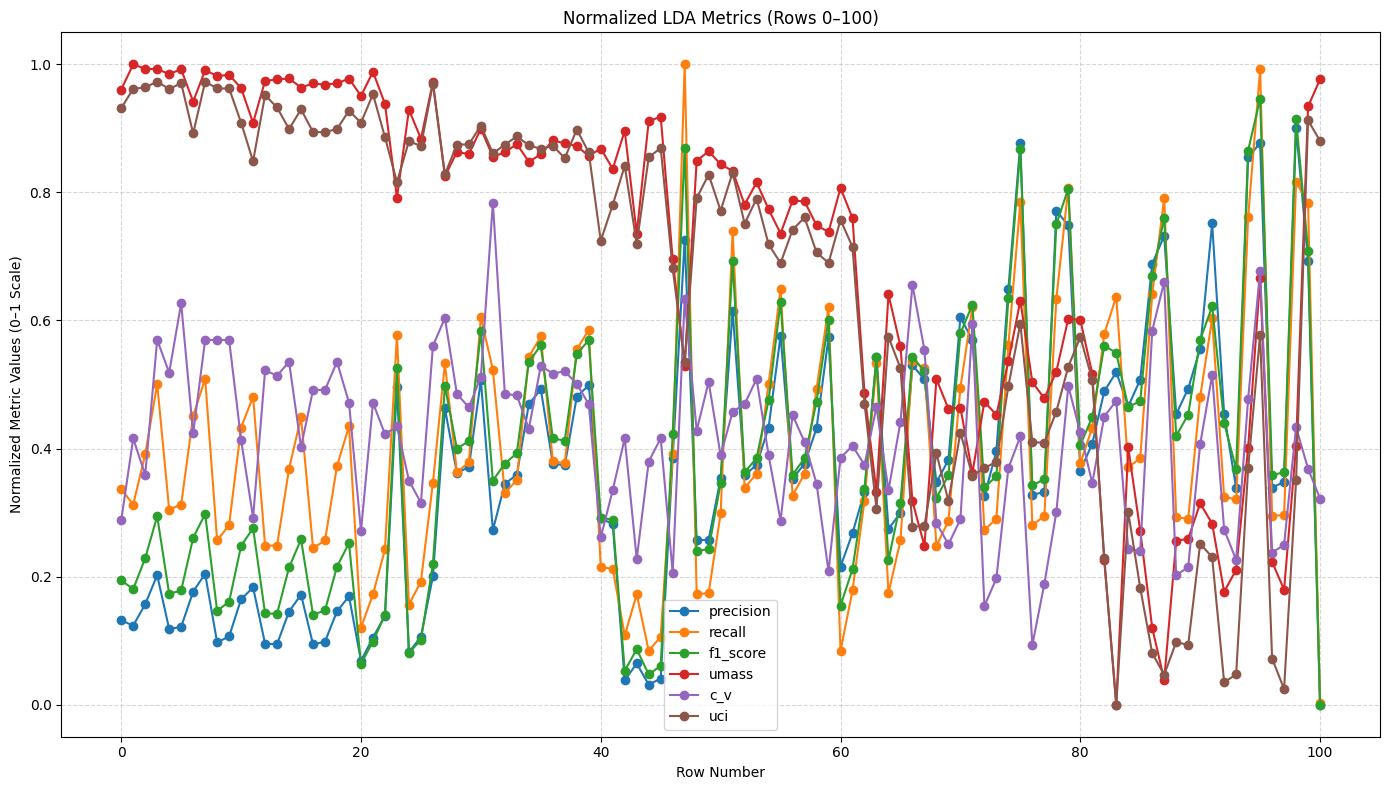

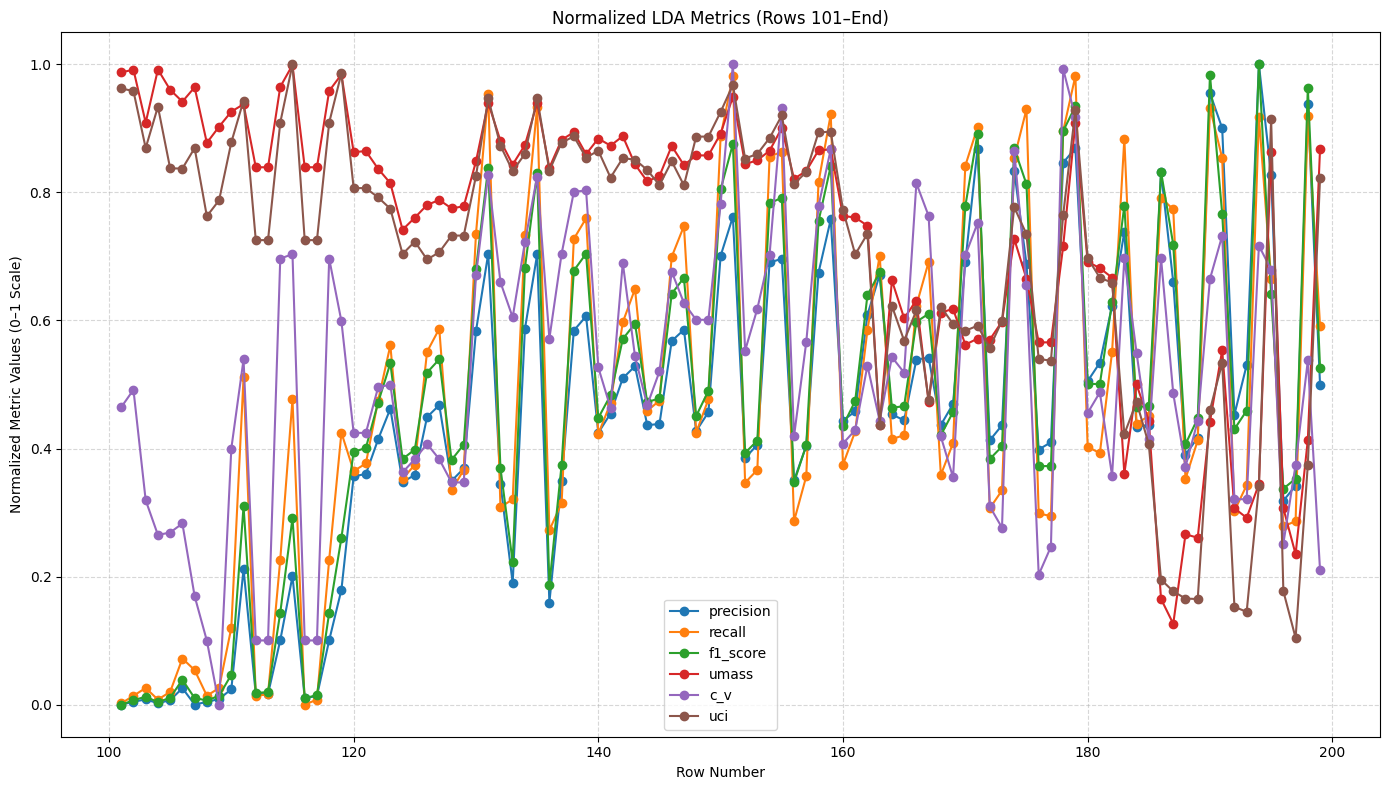

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
results_df = pd.read_excel("lda_hyperparameter_sweep_results.xlsx")

# Columns we want to normalize
metric_cols = ['precision', 'recall', 'f1_score', 'umass', 'c_v', 'uci']

# Min-max normalization
normalized_df = results_df.copy()
for col in metric_cols:
    col_min = normalized_df[col].min()
    col_max = normalized_df[col].max()
    normalized_df[col] = (normalized_df[col] - col_min) / (col_max - col_min)

# Determine the split index
split_index = 101

# ---------- First graph (0–100) ----------
plt.figure(figsize=(14, 8))
x1 = normalized_df.index[:split_index]

for col in metric_cols:
    plt.plot(x1, normalized_df[col][:split_index], label=col, marker='o')

plt.title("Normalized LDA Metrics (Rows 0–100)")
plt.xlabel("Row Number")
plt.ylabel("Normalized Metric Values (0–1 Scale)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Second graph (101–end) ----------
plt.figure(figsize=(14, 8))
x2 = normalized_df.index[split_index:]

for col in metric_cols:
    plt.plot(x2, normalized_df[col][split_index:], label=col, marker='o')

plt.title("Normalized LDA Metrics (Rows 101–End)")
plt.xlabel("Row Number")
plt.ylabel("Normalized Metric Values (0–1 Scale)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


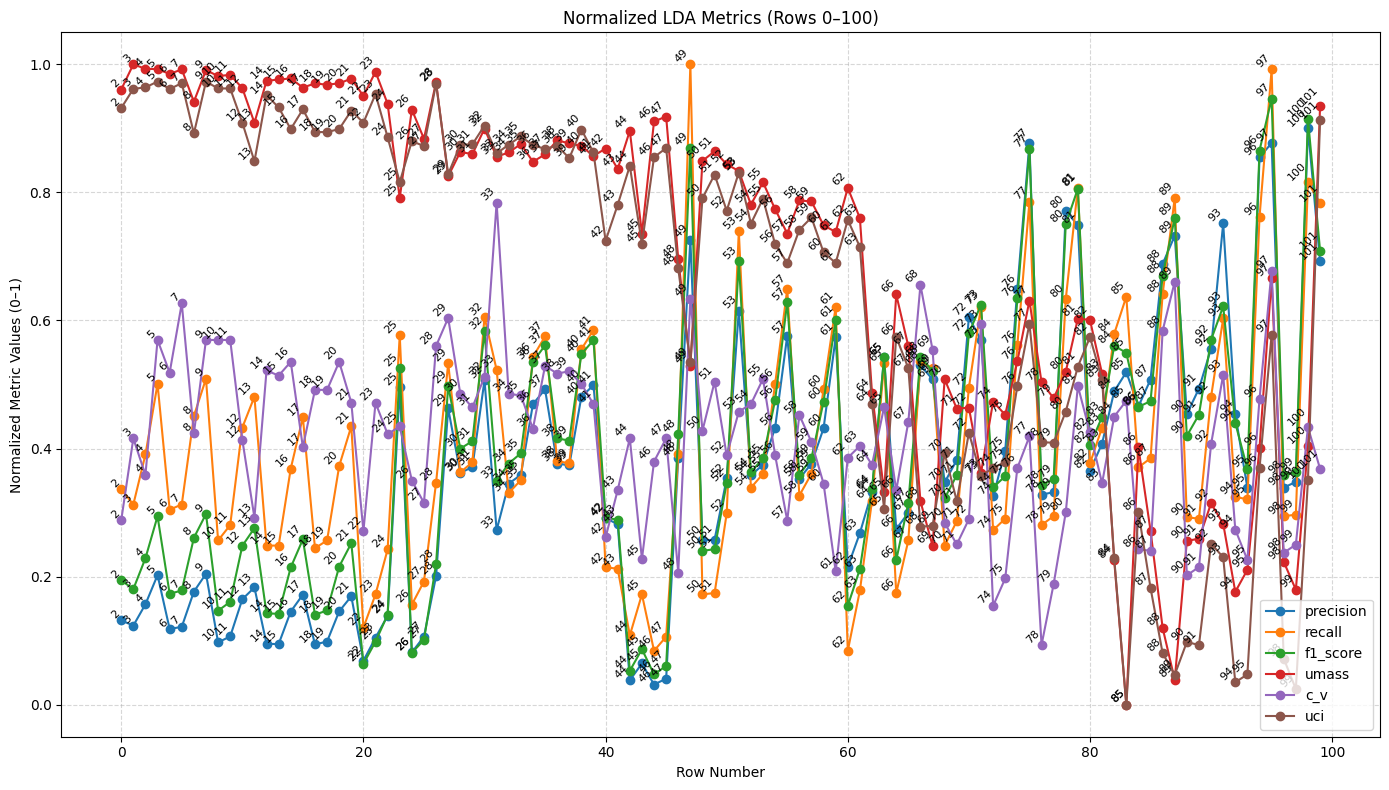

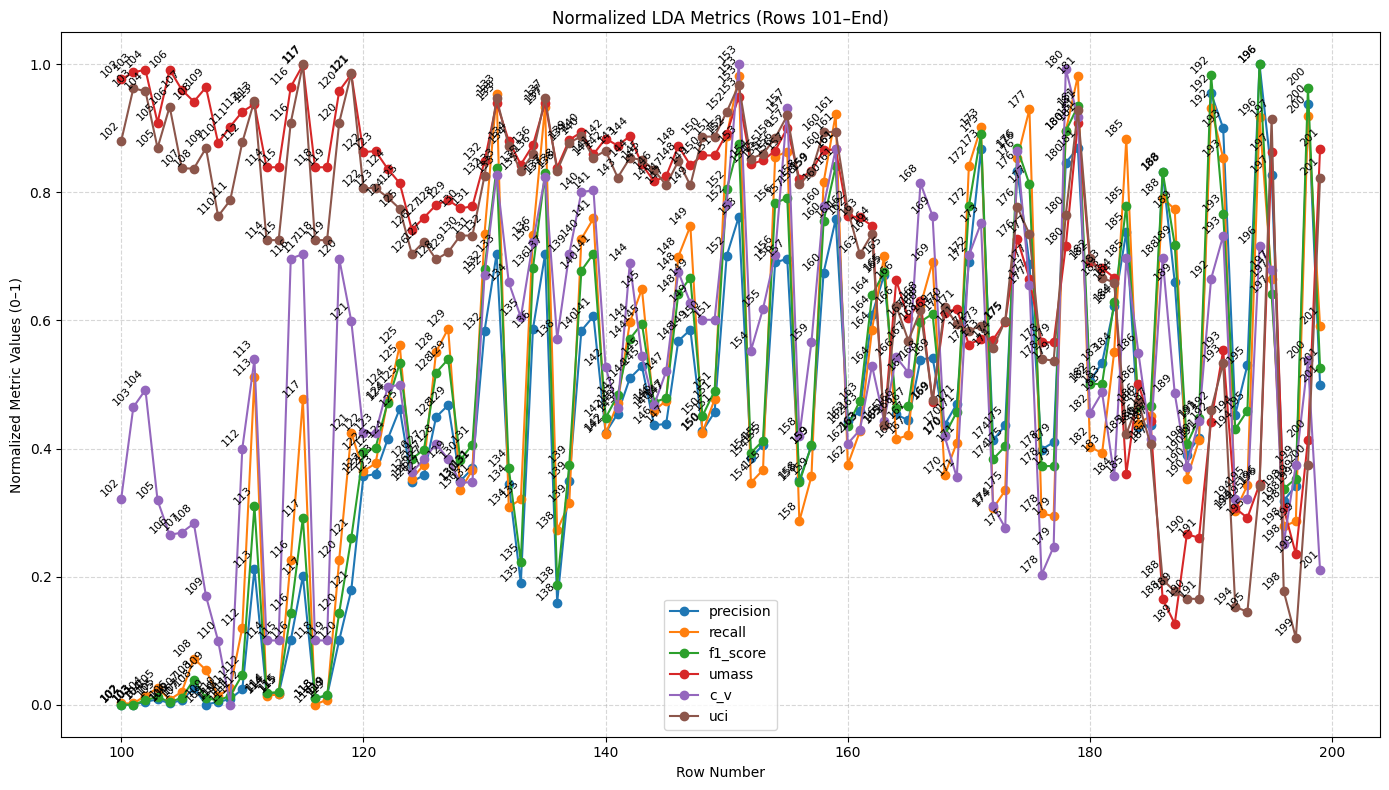

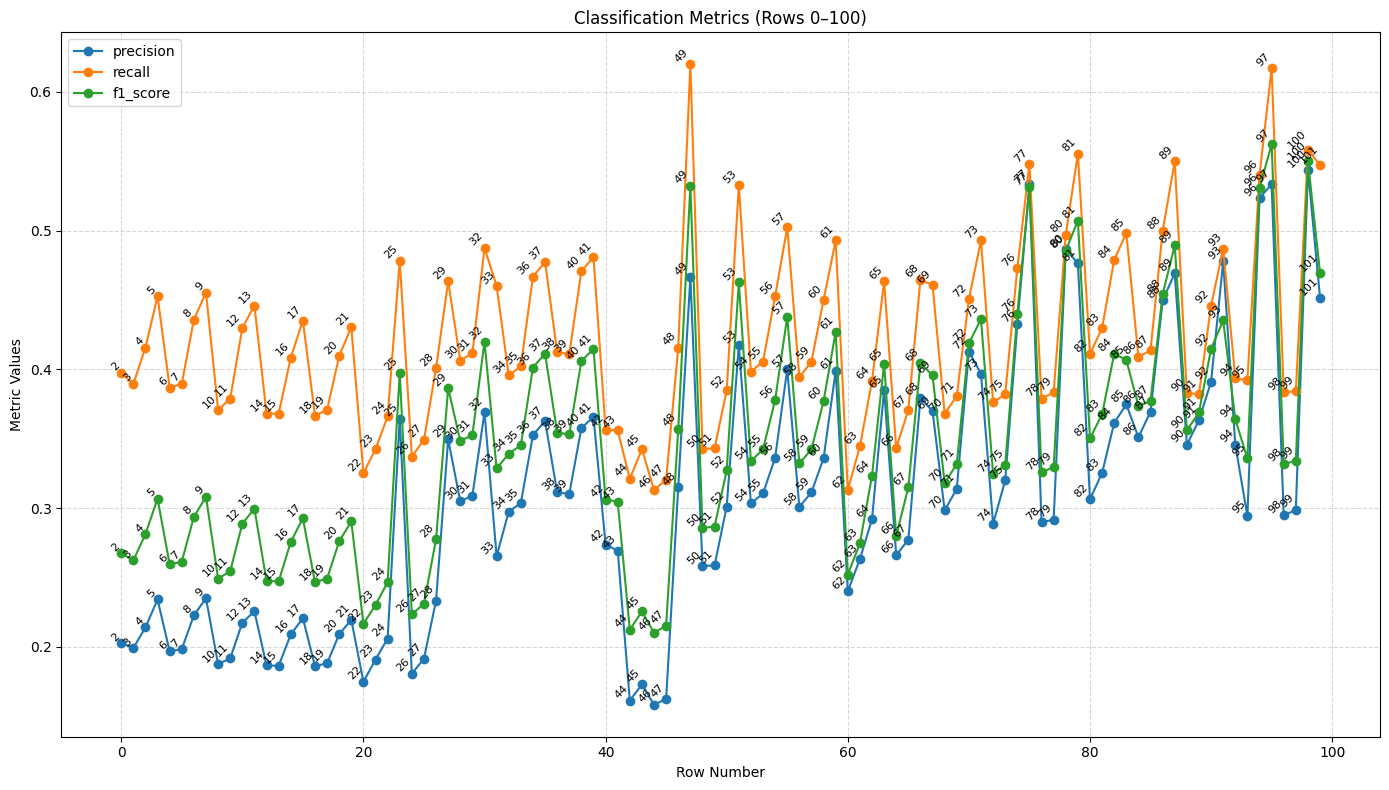

/Users/HocVuu/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



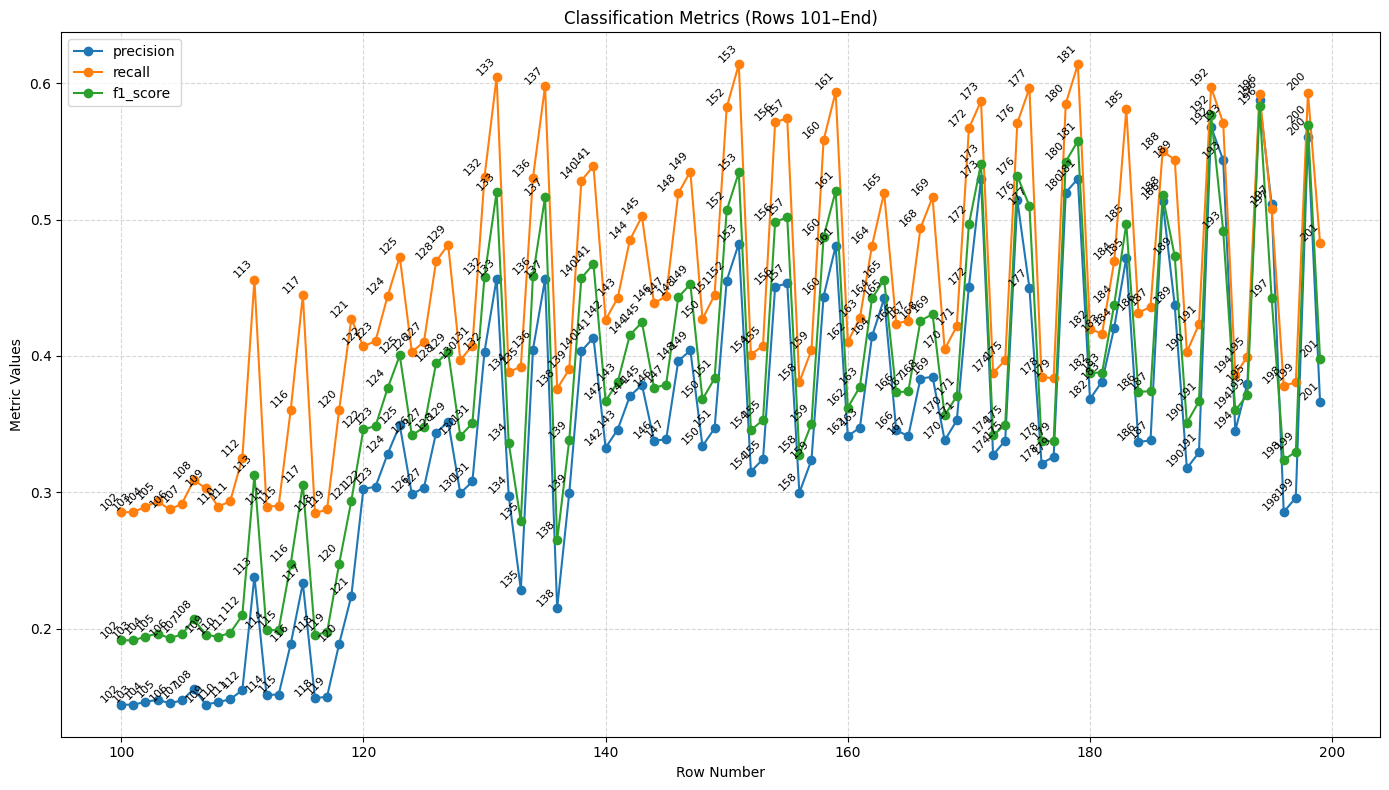

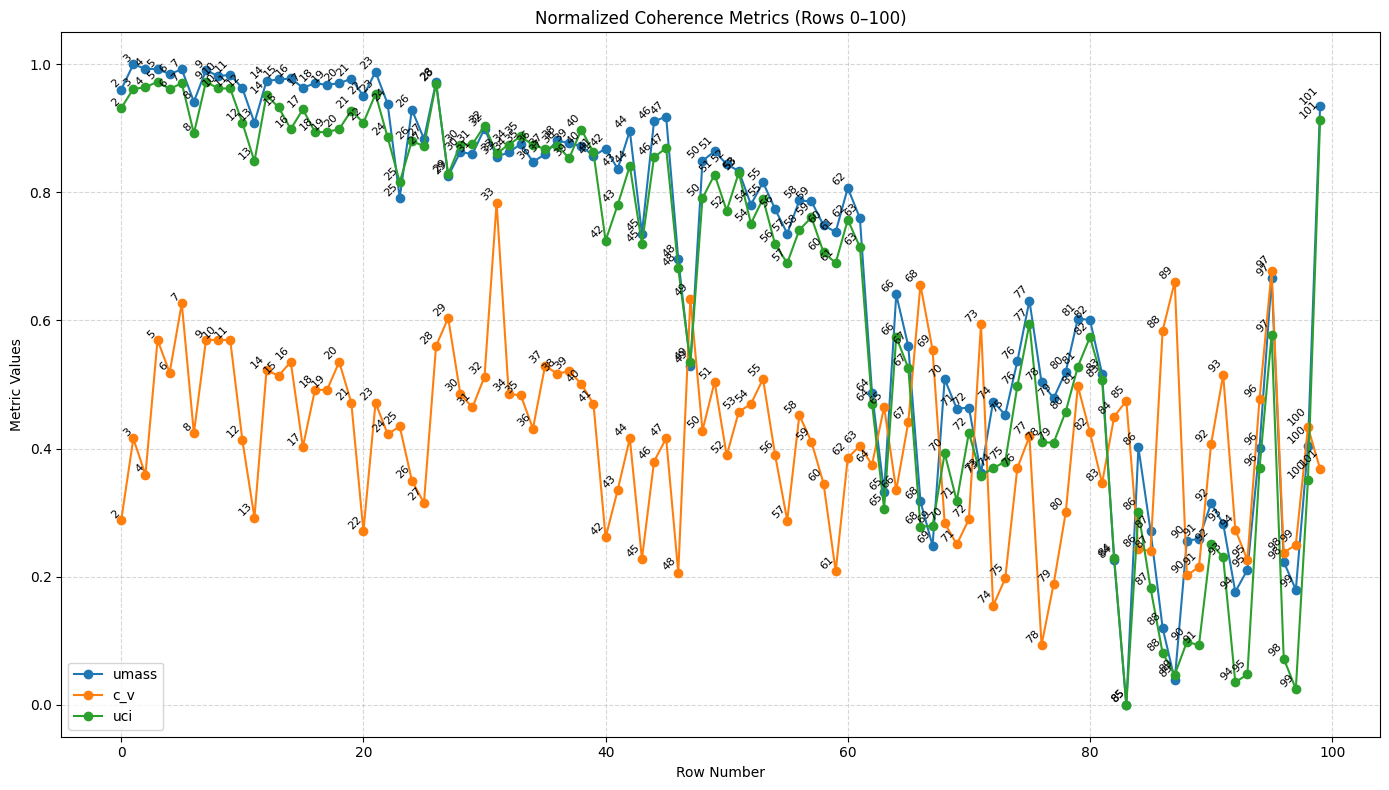

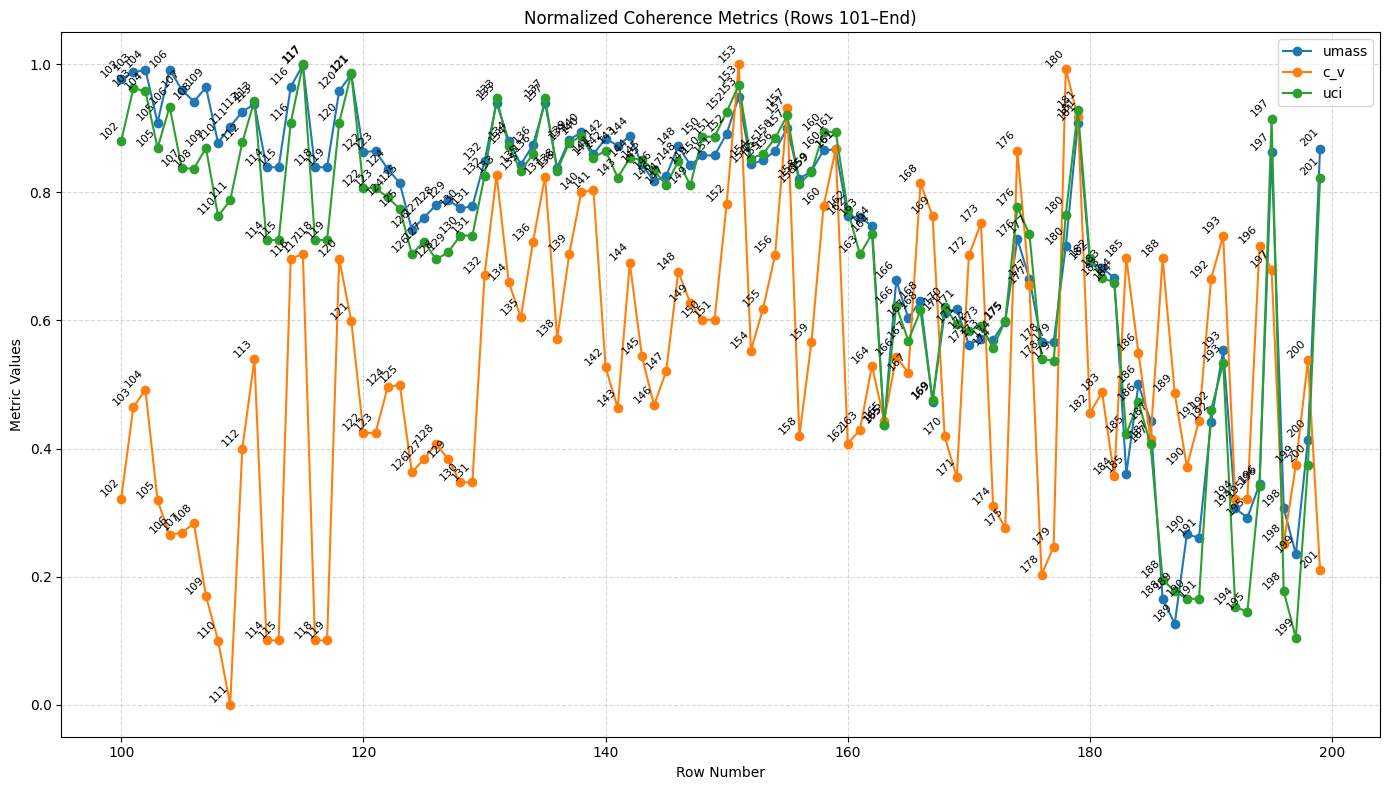

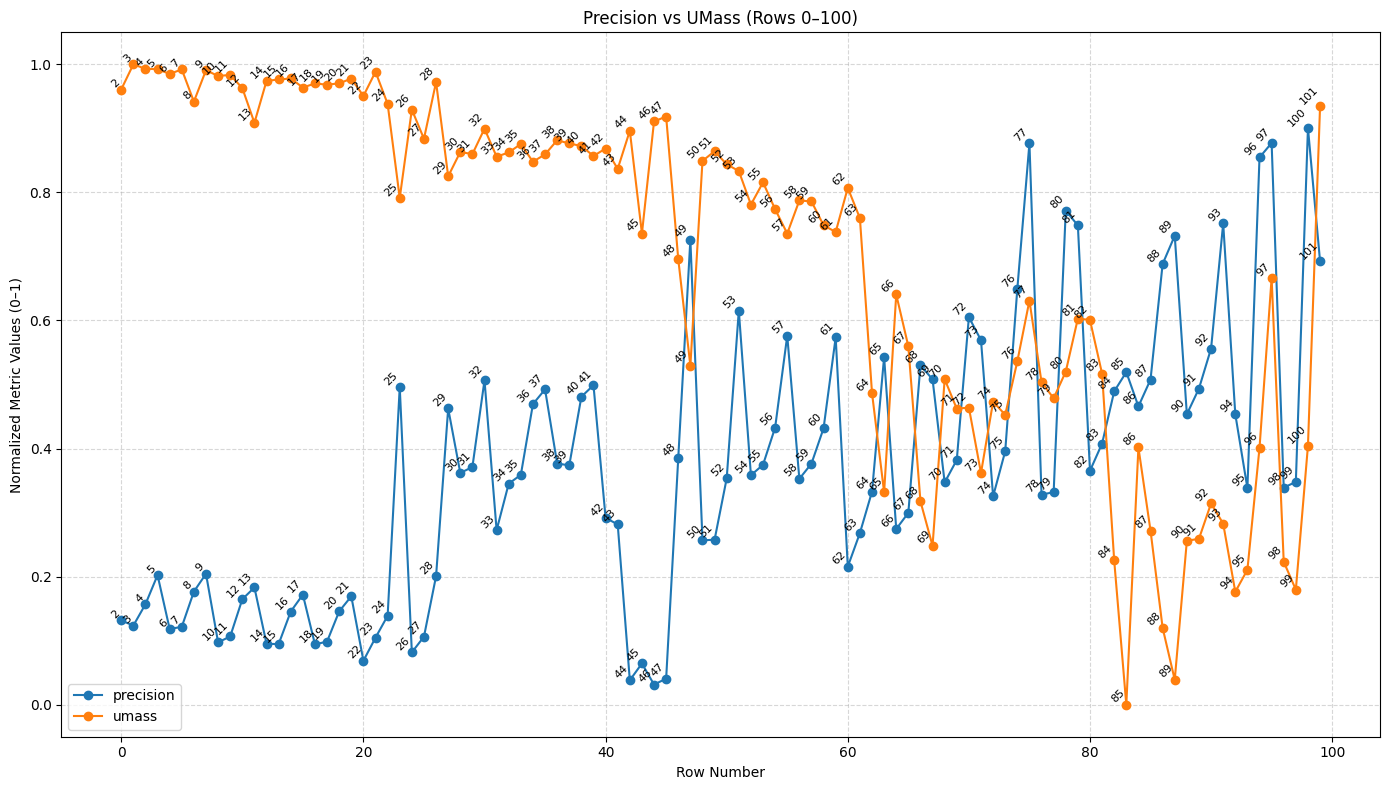

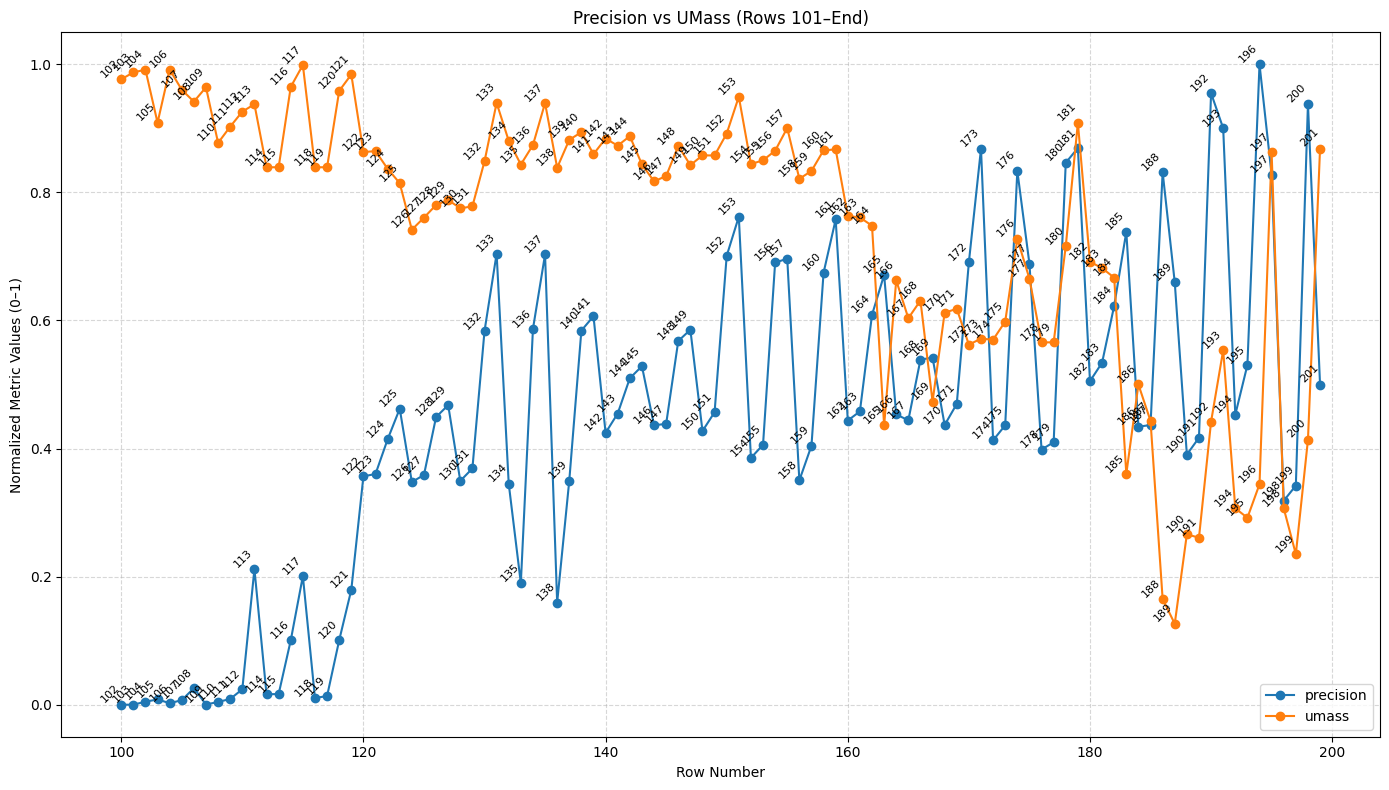

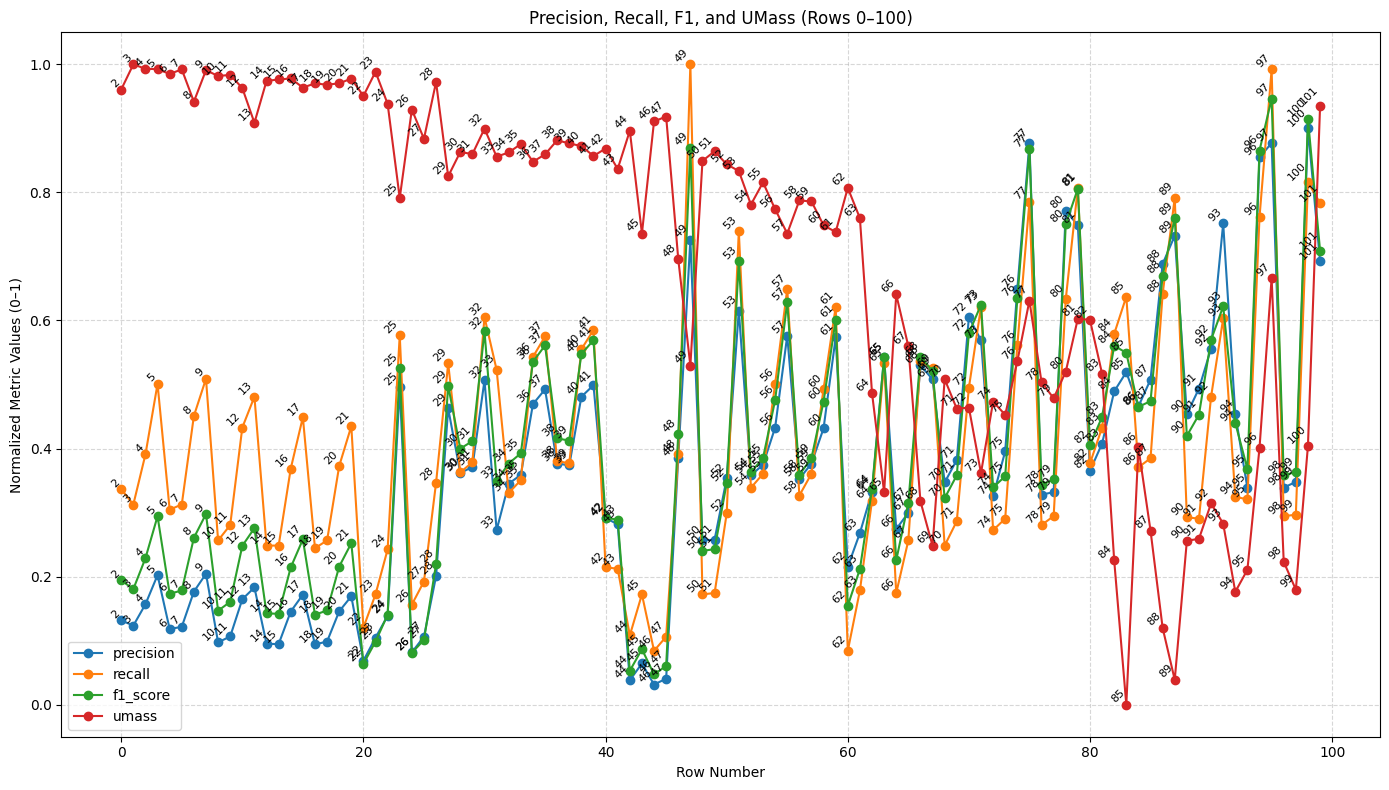

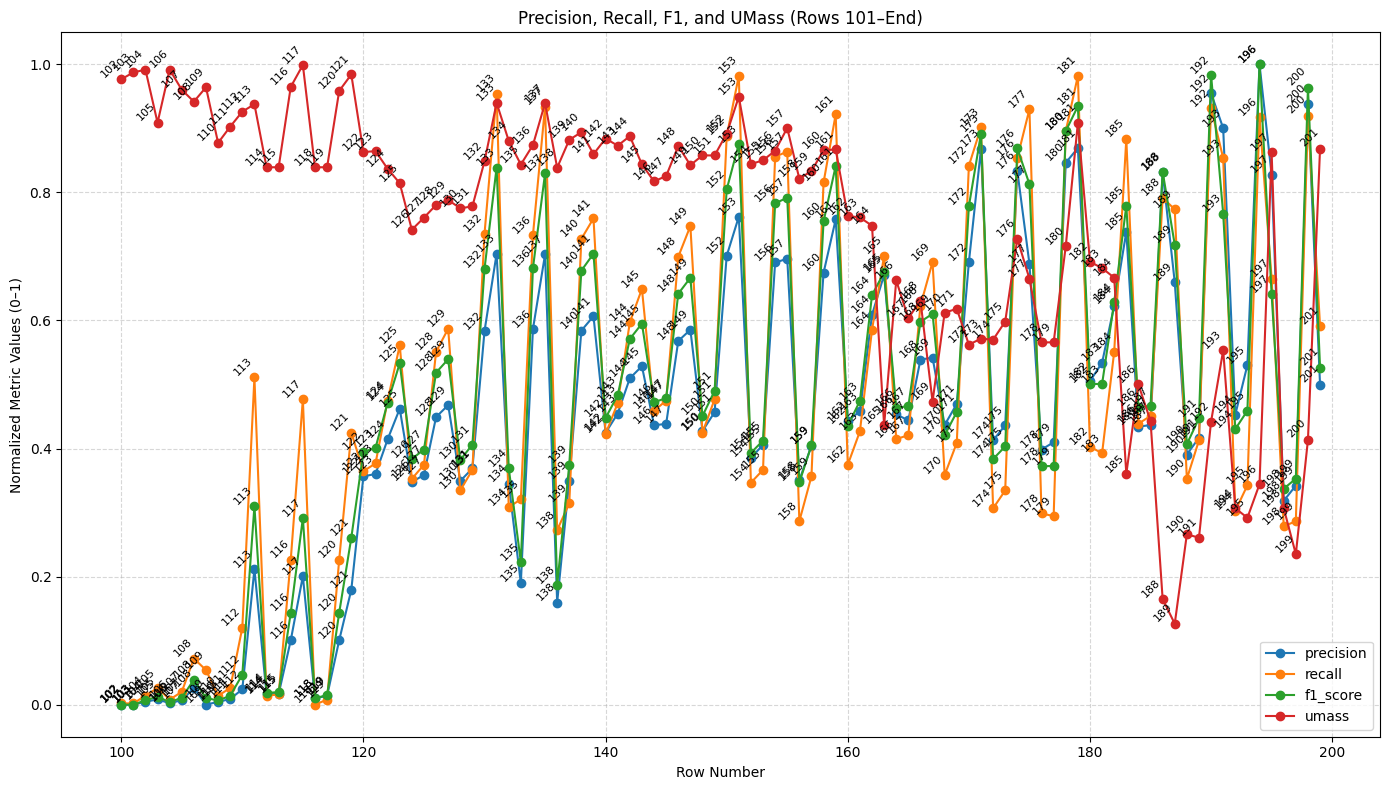

All plots saved in folder: plots


In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load results
results_df = pd.read_excel("lda_hyperparameter_sweep_results.xlsx")

# Columns for normalization
all_metrics = ['precision', 'recall', 'f1_score', 'umass', 'c_v', 'uci']
classification_metrics = ['precision', 'recall', 'f1_score']
coherence_metrics = ['umass', 'c_v', 'uci']

# ------------------- Normalization -------------------
normalized_df = results_df.copy()
for col in all_metrics:
    col_min = normalized_df[col].min()
    col_max = normalized_df[col].max()
    normalized_df[col] = (normalized_df[col] - col_min) / (col_max - col_min)

split_index = 100

# Create folder for plots
output_folder = "plots"
os.makedirs(output_folder, exist_ok=True)

def plot_with_labels(x, df, metrics, title, ylabel, filename):
    plt.figure(figsize=(14, 8))
    for col in metrics:
        plt.plot(x, df[col], label=col, marker='o')
        # Add row number as text on top of each marker
        for i, val in enumerate(df[col]):
            plt.text(x[i], val, str(df.index[i]+2), fontsize=8, rotation=45, ha='right', va='bottom')  # Excel row number
    plt.title(title)
    plt.xlabel("Row Number")
    plt.ylabel(ylabel)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    # Save the figure
    plt.savefig(os.path.join(output_folder, filename), dpi=300)
    plt.show()  # display the plot

# ---------- Normalized Graphs ----------
plot_with_labels(normalized_df.index[:split_index], normalized_df.iloc[:split_index], 
                 all_metrics, "Normalized LDA Metrics (Rows 0–100)", "Normalized Metric Values (0–1)",
                 "normalized_metrics_0_100.png")

plot_with_labels(normalized_df.index[split_index:], normalized_df.iloc[split_index:], 
                 all_metrics, "Normalized LDA Metrics (Rows 101–End)", "Normalized Metric Values (0–1)",
                 "normalized_metrics_101_end.png")

# ---------- Non-normalized Classification Metrics ----------
plot_with_labels(results_df.index[:split_index], results_df.iloc[:split_index], 
                 classification_metrics, "Classification Metrics (Rows 0–100)", "Metric Values",
                 "classification_metrics_0_100.png")

plot_with_labels(results_df.index[split_index:], results_df.iloc[split_index:], 
                 classification_metrics, "Classification Metrics (Rows 101–End)", "Metric Values",
                 "classification_metrics_101_end.png")

# ---------- Non-normalized Coherence Metrics ----------
plot_with_labels(normalized_df.index[:split_index], normalized_df.iloc[:split_index], 
                 coherence_metrics, "Normalized Coherence Metrics (Rows 0–100)", "Metric Values",
                 "coherence_metrics_0_100.png")

plot_with_labels(normalized_df.index[split_index:], normalized_df.iloc[split_index:], 
                 coherence_metrics, "Normalized Coherence Metrics (Rows 101–End)", "Metric Values",
                 "coherence_metrics_101_end.png")

# ---------- Additional Graphs ----------
plot_with_labels(normalized_df.index[:split_index], normalized_df.iloc[:split_index], 
                 ['precision', 'umass'], "Precision vs UMass (Rows 0–100)", "Normalized Metric Values (0–1)",
                 "precision_umass_0_100.png")

plot_with_labels(normalized_df.index[split_index:], normalized_df.iloc[split_index:], 
                 ['precision', 'umass'], "Precision vs UMass (Rows 101–End)", "Normalized Metric Values (0–1)",
                 "precision_umass_101_end.png")

plot_with_labels(normalized_df.index[:split_index], normalized_df.iloc[:split_index], 
                 ['precision', 'recall', 'f1_score', 'umass'], 
                 "Precision, Recall, F1, and UMass (Rows 0–100)", "Normalized Metric Values (0–1)",
                 "precision_recall_f1_umass_0_100.png")

plot_with_labels(normalized_df.index[split_index:], normalized_df.iloc[split_index:], 
                 ['precision', 'recall', 'f1_score', 'umass'], 
                 "Precision, Recall, F1, and UMass (Rows 101–End)", "Normalized Metric Values (0–1)",
                 "precision_recall_f1_umass_101_end.png")

print(f"All plots saved in folder: {output_folder}")

#datapoint 0 = row 2 on excel
#datapoint number => number + 2 on excel